# **Springboard Decision Tree Specialty Coffee Case Study - Tier 3**




# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 3***, so it will be challenging. 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 1. Sourcing and loading
## 1a. Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

## 1b. Load data 

In [2]:
# Read in the data to a variable called coffeeData
coffeeData = pd.read_csv("data/RRDinerCoffeeData.csv")

## 1c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [3]:
# Call head() on your data 
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [4]:
# Call .shape on your data
coffeeData.shape

(702, 9)

In [5]:
# Call info() on your data
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [6]:
# Call describe() on your data to get the relevant summary statistics for your data 
coffeeData.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [7]:
# Check out the names of our data's columns 
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [8]:
# Make the relevant name changes to spent_week and spent_per_week.
coffeeData.rename(columns = {
    'spent_week':'spent_last_week',
    'spent_month':'spent_last_month',
    'SlrAY':'salary'
}, inplace=True)

In [9]:
# Check out the column names
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [10]:
# Print unique genders in Gender column
coffeeData['Gender'].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [11]:
# Step 1: Remove any leading/trailing whitespace and convert all vals to lowercase
# .str.strip() → removes leading and trailing whitespace
# .str.lower() → converts the string to lowercase
coffeeData['Gender'] = coffeeData['Gender'].astype(str).str.strip().str.lower()

# Step 2: Map the standardized values to a consistent format
coffeeData['Gender'] = coffeeData['Gender'].replace({
    'm':'Male',
    'male':'Male',
    'MALE':'Male',
    'FEMALE':'Female',
    'f':'Female',
    'female':'Female'
})

# Step 3: Convert Gender to values (for machine learning purpose)
coffeeData['Gender_num'] = coffeeData['Gender'].map({'Male':1, 'Female':0})

In [12]:
coffeeData[['Gender', 'Gender_num']].head()

,Gender,Gender_num
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Female,0


In [13]:
# See the gender column's unique values 
coffeeData['Gender'].unique()

array(['Female', 'Male'], dtype=object)

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [14]:
# Replace all alternate values for the Female entry with 'Female'
# _ _ _ 

In [15]:
# Replace all alternate values with "Male"
# coffeeData['Gender'] = coffeeData['Gender'].replace(['MALE', 'male', 'M'], 'Male')

In [16]:
# Let's check the unique values of the column "gender"
# _ _ _ 

In [17]:
# Check out the unique values of the column 'Decision'
coffeeData['Decision'].unique()

array([ 1., nan,  0.])

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [18]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'
# coffeeData['Decision'] = coffeeData['Decision'].map({1.0:"YES", 0.0:"NO"})
coffeeData['Decision'] = coffeeData['Decision'].replace({1.0: "YES", 0.0: "NO"})

In [19]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
print(coffeeData['Decision'].unique())

['YES' nan 'NO']


## 2b. Train/test split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [20]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NoPrediction = coffeeData.dropna()
NoPrediction['Decision'].describe()

count     474
unique      2
top       YES
freq      303
Name: Decision, dtype: object

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

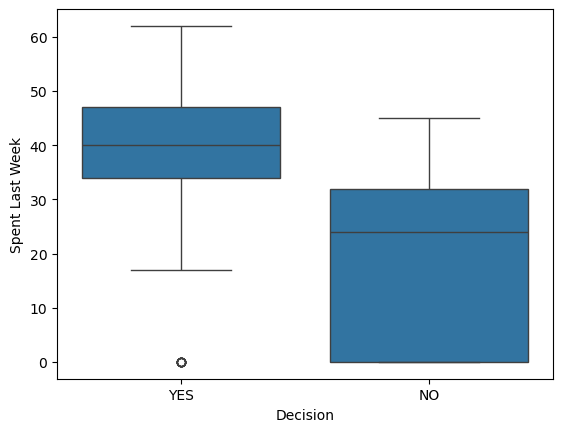

In [21]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
sns.boxplot(x='Decision', y='spent_last_week', data=NoPrediction) 
plt.xlabel("Decision")
plt.ylabel('Spent Last Week')

plt.show()

Can you admissibly conclude anything from this boxplot? Write your answer here:



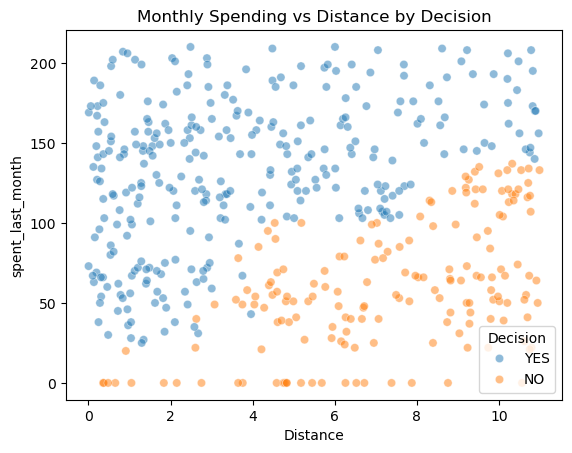

In [22]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(data=NoPrediction, 
                x='Distance', 
                y='spent_last_month', 
                hue='Decision',
               alpha=.5)
plt.title("Monthly Spending vs Distance by Decision")

plt.show()

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [23]:
# Get just those rows whose value for the Decision column is null  
Prediction = coffeeData[coffeeData['Decision'].isnull()]

In [24]:
# Call describe() on Prediction
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Gender_num
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175,0.548246
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140,0.498762
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000,1.000000


### 4. Divide the NOPrediction subset into X and y

In [25]:
# Check the names of the columns of NOPrediction
NoPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision',
       'Gender_num'],
      dtype='object')

In [26]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"
features = [col for col in NoPrediction.columns if col!='Decision']

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NoPrediction[features]

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NoPrediction['Decision']

### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

 ***When should you use drop_first=True?***

✅ Yes → If you're using linear/logistic regression or models sensitive to multicollinearity.

❌ No → If you're using tree-based models (like decision trees or random forests), which don’t care about multicollinearity — in that case, keeping all dummies is fine.

In [27]:
# One-hot encode all features in X.
#
X = pd.get_dummies(X, drop_first=False)

### 6. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [28]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=246)

# 3. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

# 3.1 Decision Tree

A decision tree is a simple model that makes decisions by splitting data into branches based on feature values. It's easy to understand and visualize, but can easily overfit.

- Two types of decision tree:
  - **Entropy model** (uses information gain)
  - **Gini model** (uses Gini impurity)

---

# 3.2 Random Forest

Random Forest is an ensemble of many decision trees. Each tree sees a random subset of the data and features. The final prediction is based on majority vote (for classification) or average (for regression).

- More stable and accurate than a single decision tree  
- Slower and less interpretable

---

# 3.3 Gradient Boosting (e.g., XGBoost, LightGBM)

Gradient Boosting builds trees sequentially. Each new tree tries to fix the errors made by the previous one. It focuses on the hardest-to-predict samples.

- Often achieves very high accuracy  
- More sensitive to overfitting and takes longer to train


# What's the difference between Entropy model vs Gini model?

1. Difference between two models

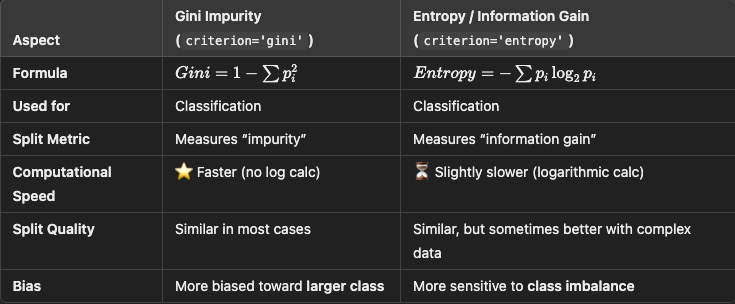

2. Visual Analogy
    - Gini focuses on "how mixed" the classes are (impurity)
    - Entropy focuses on "how uncertain" the prediction is (information gain)
While both aim to reduce uncertainty, they do so with slightly different math.

3. Which one should you use?
    - A faster model: use Gini
    - Care more about information theory/math: Try Entropy
    - Dataset is large: Gini is faster
    - Unsure: Try both

# Confusion Matrix

||Actually Positive (1)|Actually Negative (0)  || 
|-----|:-----|:---:|:-----:|
|Predicted Positive (1)|True Positives (TPs)  |False Positives (FPs)   ||
|Predicted Negative (0)|False Negatives (FNs)|True Negatives (TNs)   ||

***1. True Positives (TP)***
- The model predicted positive (1)
- The actual label was also positive (1)
* ✅ The model was correct.

***2. False Positives (FP)***
- The model predicted positive (1)
- But the actual label was negative (0)
* ❌ The model was wrong.***（Type I Error）***
* 例子：模型说他有病，但是他没有病***（Type I Error)***

***3. False Negatives (FN)***
- The model predicted negative (0)
- But the actual label was positive (1)
* ❌ The model was wrong.***（Type II Error）***
* 例子：模型说他没病，但他有病。***（Type II Error）***

***4. True Negatives (TN)***
- The model predicted negative (0)
- The actual label was also negative (0)
* ✅ The model was correct.

# Ensemble Metrics

| Metrics Name | 中文解释 | Explanation |
|:-------------|:---------|:------------|
| Accuracy              | 准确率                             | 模型总体判断正确的比例（即：TP + TN / 总样本数） |
| Precision             | 精确率                             | 被预测为正的样本中，真正为正的比例（TP / TP + FP） |
| Recall                | 召回率/灵敏度（Sensitivity）         | 实际为正的样本中，被预测正确的比例（TP / TP + FN） |
| Specificity           | 特异度                             | 实际为负的样本中，被预测正确为负的比例（TN / TN + FP） |
| F1 Score              | F1 分数                            | 精确率和召回率的调和平均数（平衡两者 - Precision & Recall） |
| Balanced Accuracy     | 平均的sensitivity and specificity  | Balanced Accuracy = (Sensitivity + Specificity / 2) |

# Type 1 & Type II Errors
- Type I: 误报（告诉你有病，但是你没病）
- Type II：漏报（你有病，但是系统说你没病）

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [29]:
from sklearn import tree

# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion='entropy') # the default Gini-based CART

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred_series = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy')

***1. What is export_graphviz?***

export_graphviz is a function from scikit-learn that converts a trained Decision Tree model into a Graphviz-compatible format — specifically, a text-based .dot file.

***2. 🧠 Why use it?***

To visualize your decision tree in a clean, hierarchical structure with:

    . Feature names at each node
    . Thresholds or splitting conditions
    . Class names at the leaves
    . Colors and shapes that represent purity and class distribution

In [30]:
# Now we want to visualize the tree
from sklearn.tree import export_graphviz

# We can do so with export_graphviz
dot_data = export_graphviz(
    decision_tree = entr_model,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['NO', 'YES'],
    filled=True,
    rounded=True
)

# Alternatively for class_names use entr_model.classes_
class_names = entr_model.classes_

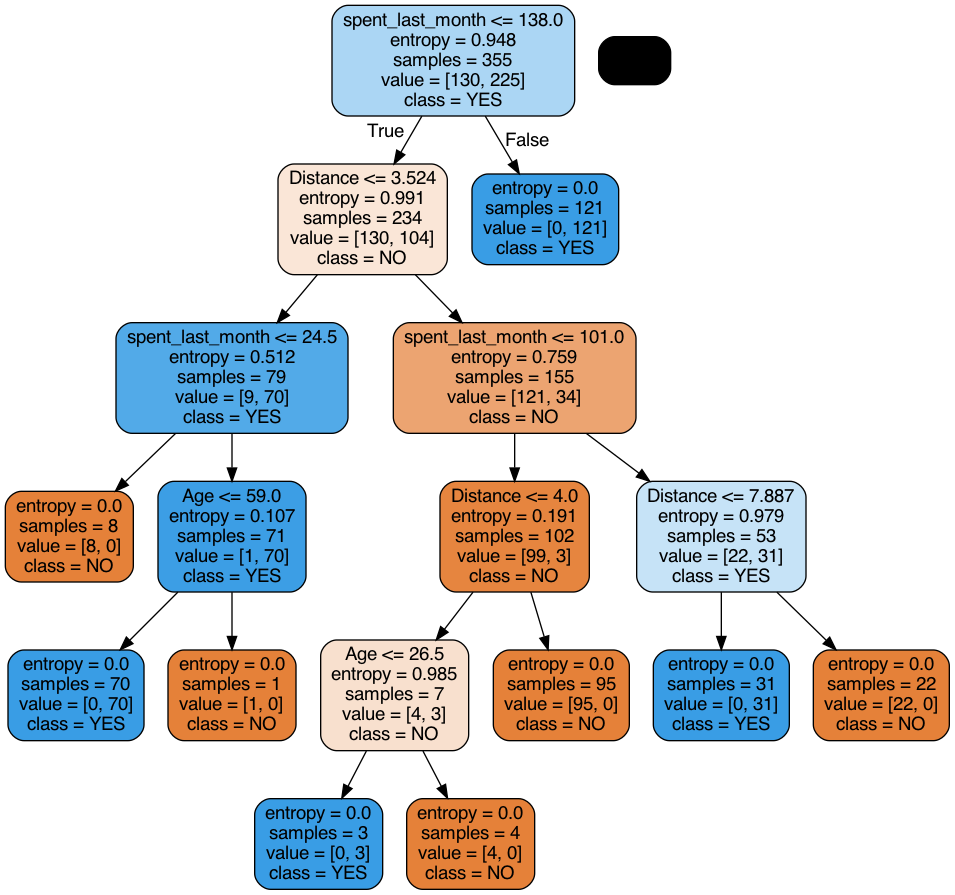

In [31]:
from IPython.display import Image

# Render the image?
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [32]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth\n")

print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"Balanced accuracy: {metrics.balanced_accuracy_score(y_test,y_pred)*100:.2f}%\n")

print(f"Precision score for 'Yes': {metrics.precision_score(y_test,y_pred, pos_label = 'YES')*100:.2f}%")
print(f"Precision score for 'No': {metrics.precision_score(y_test,y_pred, pos_label = 'NO')*100:.2f}%\n" )

print(f"Recall score for Yes: {metrics.recall_score(y_test,y_pred, pos_label = 'YES')*100:.2f}%")
print(f"Recall score for 'No': {metrics.recall_score(y_test,y_pred, pos_label = 'NO')*100:.2f}%" ) # high recall = few false negatives

Model Entropy - no max depth

Accuracy: 99.16%
Balanced accuracy: 98.78%

Precision score for 'Yes': 98.73%
Precision score for 'No': 100.00%

Recall score for Yes: 100.00%
Recall score for 'No': 97.56%


***What can you infer from these results?***

The entropy-based decision tree model performed as follows:
- Overall accuracy was 99.16%, indicating the model correctly predicted 99.16% of all test cases.
- The balanced accuracy of 98.78% suggests the model handles class imbalance reasonably well.
- For the "YES" class:
    - Precision: 98.74%, indicates when the model predicts "YES", it's correct 98.74% of the time.
    - Recall: 100%, meaning the model detects 100% of all actual "YES" cases
- For the "NO" class:
    - Precision: 100%
    - Recall: 97.56%

High Recall: 模型成功找出了大部分（甚至全部）实际为正类（positive class）的样本。

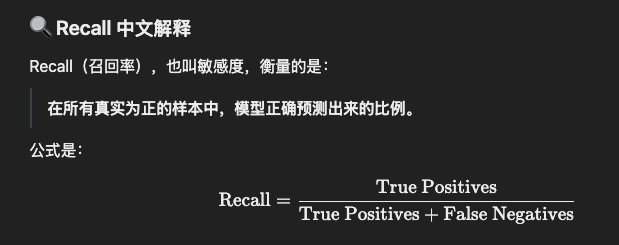

***📈 所以 Recall 高代表：***

模型没漏掉什么重要的“YES”样本。尤其重要在：1）医疗诊断（别漏掉病人）2）欺诈检测（宁可多抓点，也别漏掉真诈骗）3）安全检测等高风险领域

***⚠️ 注意***

Recall 高 ≠ 模型一定好。还要结合 Precision（精准率） 一起看。如果 Recall 很高但 Precision 很低，可能模型“撒网很广”，导致很多误判。所以两者平衡最重要，通常会用 F1 score 综合考虑。

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred_gini = gini_model.predict(X_test) 

# Turn y_pred into a series, as before
y_pred_giniS = pd.Series(y_pred_gini)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=42)

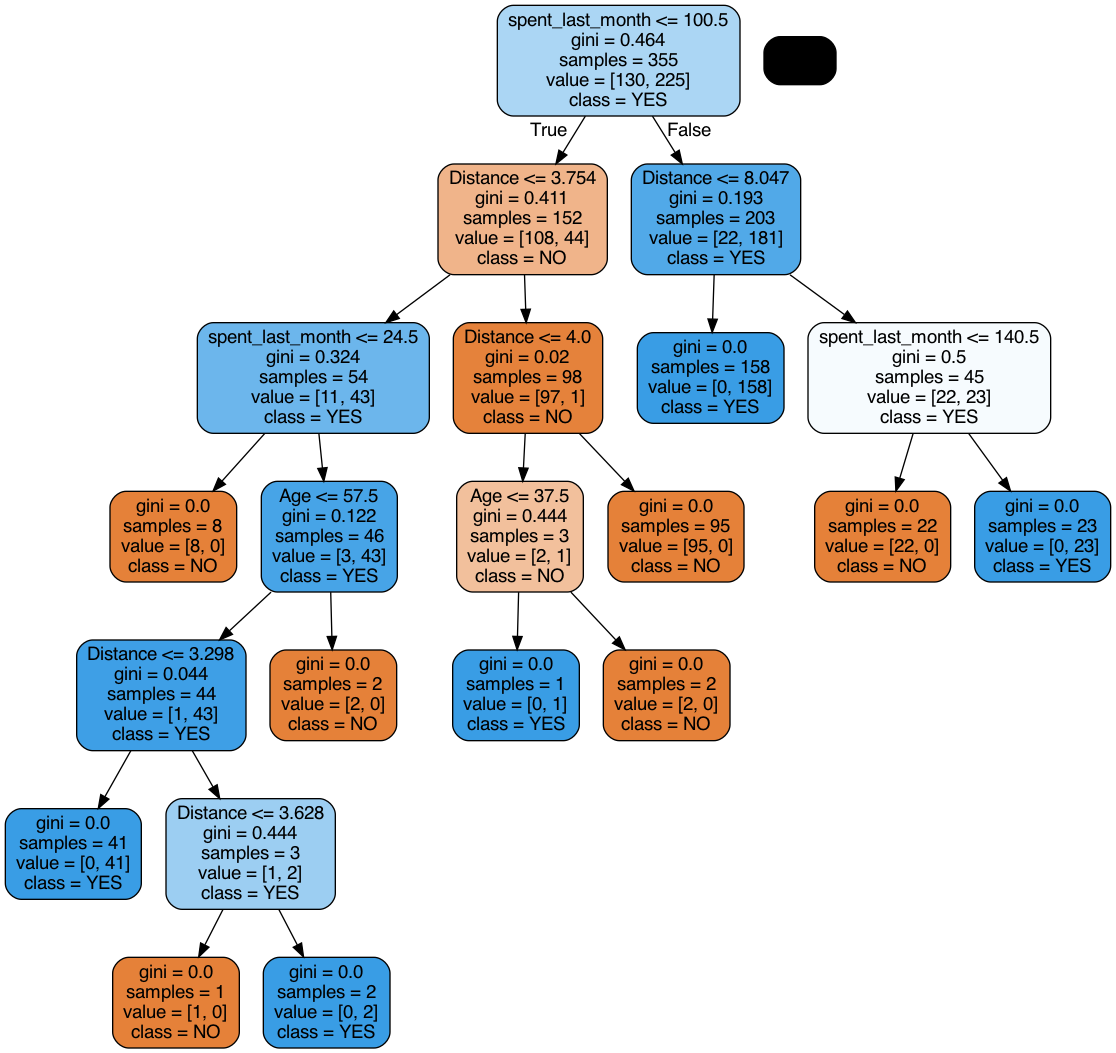

In [34]:
# As before, but make the model name gini_model
# Creates an in-memory text stream using StringIO, which is needed to store the .dot format (Graphviz representation) before visualizing it.
dot_data = StringIO()

export_graphviz(
    decision_tree = gini_model,
    out_file = dot_data, # out_file: where to send the output
    feature_names = X_train.columns,
    class_names = ['NO', 'YES'], # class_names: labels for the target classes ('NO' and 'YES').
    filled = True,
    rounded = True
) 

# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the tree
Image(graph.create_png())

***How Gini relates to Purity?***

- Low Gini -> High Purity: This means the node contains mostly samples from a single class. It's a 'clean' split - the lower the Gini impurity, the purer the node.
- High Gini -> Low Purity: This means the node contains a mix of different classes. It's a 'messy' split - the higher the Gini impurity, the less pure the node.

***The right side of the root node:***
spent_last_month > 100.5 → True branch
├── Distance <= 8.047
│   └── class = YES (with very low Gini, high purity)

***Interpretation:***
Customers who spent more than $100.5 last month and live within 8.047 km of the business are very likely to respond with YES - in fact, that branch has 158 samples, all of which are YES.

***Color Coding & Interpretation***
- Blue Nodes: Predicted class is YES
- Orange Nodes: Predicted class is NO
- Deeper Blue/Orange = More pure

***Overall Insights:***
- Customers who spent more than 100.5 last month and live less than 8 km away are very likely to be YES.
- If they spent less than 100.5, the distance and past spending behavior matter a lot.
- Features like Age help with finer distinctions in edge cases.

In [35]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score 0.9873417721518988
Recall score 0.975609756097561


How do the results here compare to the previous model? Write your judgements here: 

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [36]:
entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123) 

# Call fit() on entr_model
entr_model2.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model2.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred_series = pd.Series(y_pred)

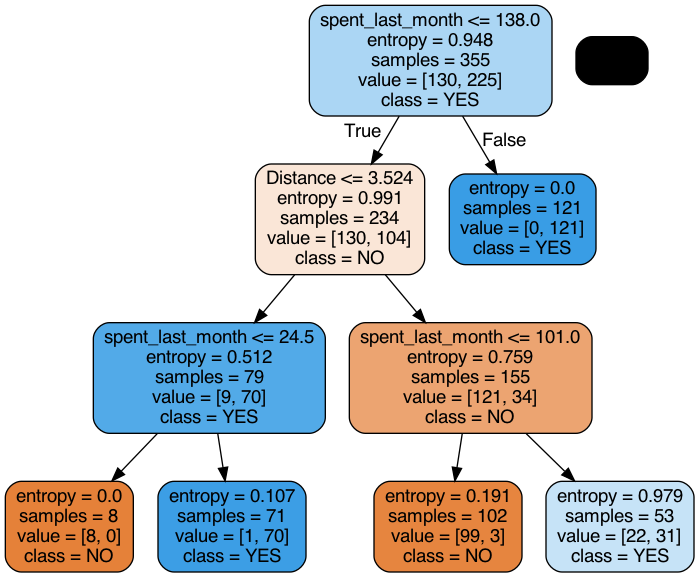

In [37]:
from io import StringIO
# from sklearn.tree import export_graphviz
# import pydotplus
from IPython.display import Image

# Create a StringIO buffer
dot_data = StringIO()

# Export the tree into DOT format and write it to the buffer
export_graphviz(
    decision_tree=entr_model2,
    out_file=dot_data,  # use the buffer here
    feature_names=X_train.columns,
    class_names=['NO', 'YES'],  # or use entr_model2.classes_
    filled=True,
    rounded=True
)

# Generate graph from the DOT data string
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the tree
Image(graph.create_png())


***Interpretation:*** The right side of the root node: spent_last_month>138, 121 samples met the condition, all items were labeled 'YES' (entropy=0.0 perfectly pure)

In [38]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3\n")

print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"Balanced accuracy: {metrics.balanced_accuracy_score(y_test,y_pred)*100:.2f}%\n")

print(f"Precision score for 'Yes': {metrics.precision_score(y_test,y_pred, pos_label = 'YES')*100:.2f}%")
print(f"Precision score for 'No': {metrics.precision_score(y_test,y_pred, pos_label = 'NO')*100:.2f}%\n")

print(f"Recall score for 'Yes': {metrics.recall_score(y_test,y_pred, pos_label = 'YES')*100:.2f}%")
print(f"Recall score for 'No': {metrics.recall_score(y_test,y_pred, pos_label = 'NO')*100:.2f}%")

Model Entropy model max depth 3

Accuracy: 90.76%
Balanced accuracy: 86.59%

Precision score for 'Yes': 87.64%
Precision score for 'No': 100.00%

Recall score for 'Yes': 100.00%
Recall score for 'No': 73.17%


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

- Still strong on identifying YES cases (no false negatives - perfect recall)
- But not as good at identifying No cases (misses ~ 27% of them -> more false positives)
- Likely underfitting due to shallow depth

## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [39]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = DecisionTreeClassifier(criterion ='gini', random_state = 1234, max_depth  = 3 )

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)

y_pred_gini2 = gini_model2.predict(X_test)

y_pred_gini2S = pd.Series(y_pred_gini2)

gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

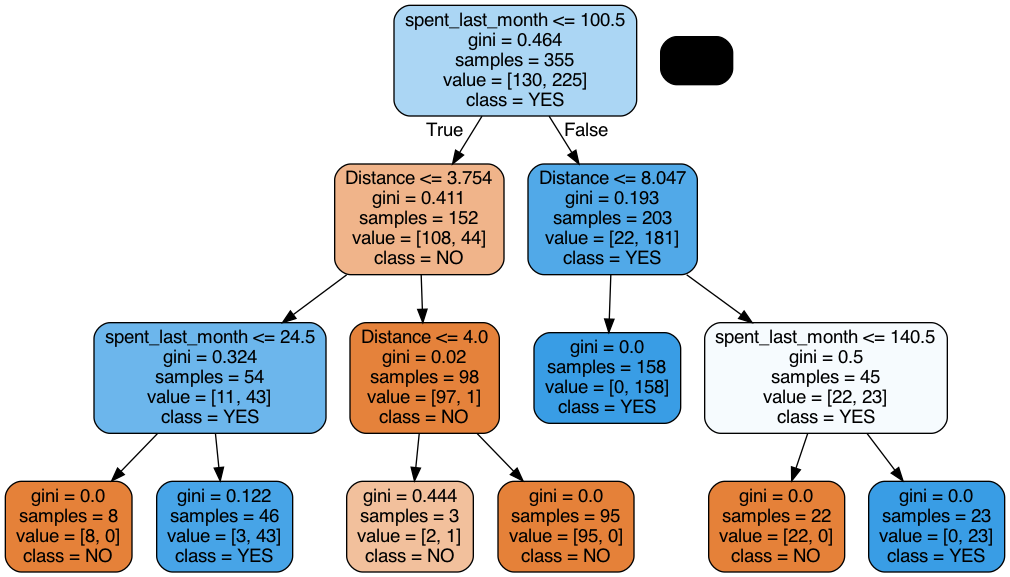

In [40]:
# Visualize the tree
dot_data = StringIO()

export_graphviz(
    decision_tree = gini_model2,
    out_file = dot_data,
    feature_names = X_train.columns,
    class_names = ['NO', 'YES'],
    filled = True,
    rounded = True
)


# Alternatively for class_names use gini_model2.classes_
class_names = gini_model2.classes_

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [41]:
print("Gini impurity  model - max depth 3\n")
print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"Balanced accuracy: {metrics.balanced_accuracy_score(y_test,y_pred)*100:.2f}%\n")
print(f"Precision score: {metrics.precision_score(y_test,y_pred, pos_label = 'YES')*100:.2f}%" )
print(f"Recall score: {metrics.recall_score(y_test,y_pred, pos_label = 'NO')*100:.2f}%")

Gini impurity  model - max depth 3

Accuracy: 90.76%
Balanced accuracy: 86.59%

Precision score: 87.64%
Recall score: 73.17%


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

***Model Entropy - no max depth***
- High accuracy and recall suggest the model is very good at predicting both classes, especially "Yes" buyers
- 100% recall for 'Yes' -> The model caught every single true buyer (no false negatives). That's excellent if your goal is to avoid missing potential customers.
- Precision for 'No' is 100% -> Every person the model predicted as 'No' truly won't buy. So no false positives for 'No'
- Slight drop in recall for 'No' (97.56%) means a few actual. 'No' os were incorrectly predicted as 'Yes' - the model is a bit more generous in calling someone a buyer.

***Model Entropy - max_depth=3***
- The max_depth tree is highly accurate, but at the risk of overfitting - it learns too much from the training data and may not generalize well
- The depth-3 tree is simpler, easier to interpret, and may generalize better on unseen data, especially with limited training examples
- Since it perfectly identifies buyers, it still works well in a customer acquistion context - just with a tradeoff in precision

***Gini Model 1 - no max limit***
- Higher complexity
- More splits on features like Age, Distance, etc
- Probably achieves higher accuracy/recall, but risk of overfitting

***Gini Model 2 - max_depth=3***
- Tree Depth 3 -> Simpler, fewer nodes

While the accuracy of the depth-3 model isn't the highest, it's the best model we've produced so far because it's interpretable, generalizes well, and avoids overfitting. Its structure is clean and easy to explain to stakeholders, and it still achieves strong performance with balanced precision and recall. The model captures the most important decision logic (like spent_last_month and Distance) without becoming overly specific to the training data, making it more reliable in real world use.

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [49]:
# Call value_counts() on the 'Decision' column of the original coffeeData
coffeeData['Decision'].value_counts()

Decision
YES    303
NO     171
Name: count, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [50]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = coffeeData.columns.drop('Decision')

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feature_cols]

In [51]:
feature_cols

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Gender_num'],
      dtype='object')

In [60]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X_encoded = pd.get_dummies(new_X)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
# new_X_encoded =  new_X_encoded.reindex(columns=X_train.columns, fill_value=0)
potential_buyers = gini_model.predict(new_X_encoded)

In [63]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True
# ????
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 48, 180]))

The total number of potential buyers is 303 + 183 = 486

In [62]:
# Print the total number of surveyed people 
print("The total number of surveyed people was", coffeeData.Online.count())

The total number of surveyed people was 702


In [70]:
# Let's calculate the proportion of buyers
per = 486/702 *100

The proportion of buyers is 69.23%


In [71]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print(f"The proportion of buyers is {per:.2f}%")

The proportion of buyers is 69.23%


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [95]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth=3, random_state=42) # n_estimators=100 -> accuracy: 96.24%

# Model and fit
firstRFModel.fit(X_train, y_train)
# Prediction
y_pred_rf = firstRFModel.predict(X_test)

# Evaluate the mode
print(f"1). Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%\n")
print(f"2). Classification Report: ", classification_report(y_test, y_pred_rf))
print(f"\n3). Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))

1). Accuracy: 93.28%

2). Classification Report:                precision    recall  f1-score   support

          NO       0.97      0.83      0.89        41
         YES       0.92      0.99      0.95        78

    accuracy                           0.93       119
   macro avg       0.94      0.91      0.92       119
weighted avg       0.94      0.93      0.93       119


3). Confusion Matrix: 
 [[34  7]
 [ 1 77]]


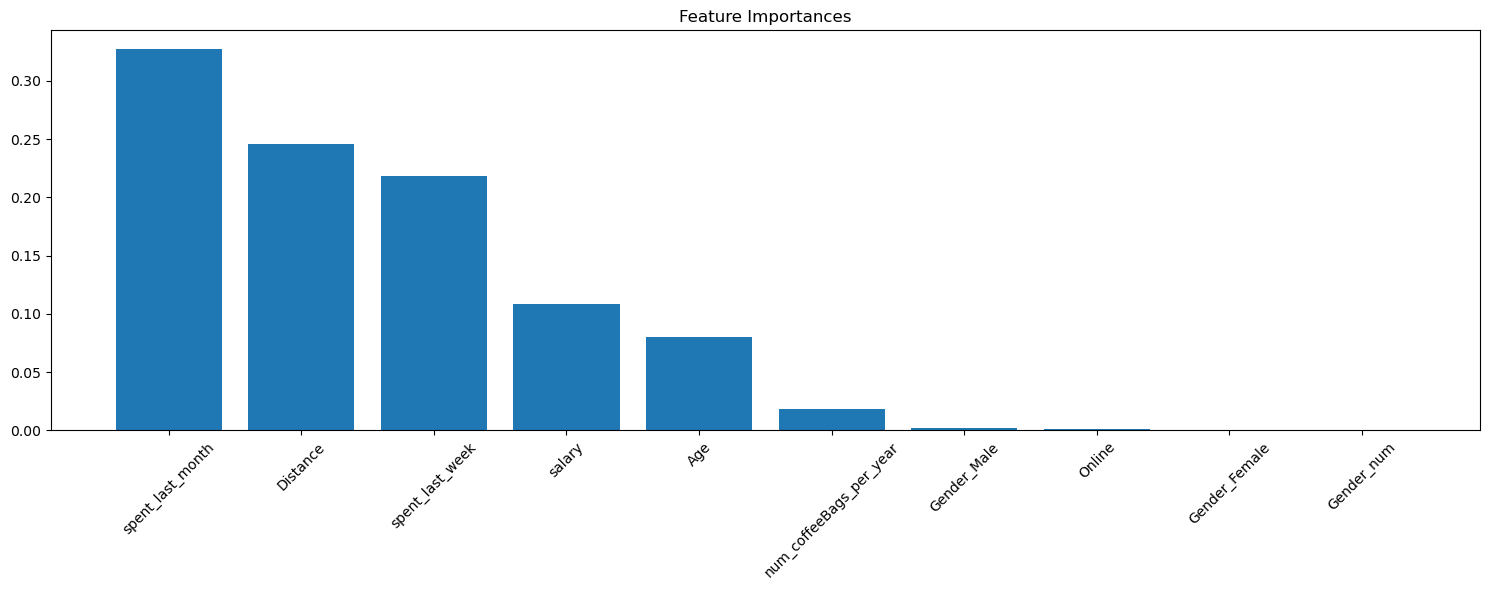

In [121]:
# Get feature importances and sort
importances = firstRFModel.feature_importances_
# np.argsort(importances) returns the indices that would sort the array in ascending order.
# [::-1] reverses the array to get descending order (most important first).
# indices now holds the positions of features ranked by importance.
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices]) # .shape[1] → number of columns (features)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)

plt.tight_layout()
plt.show()

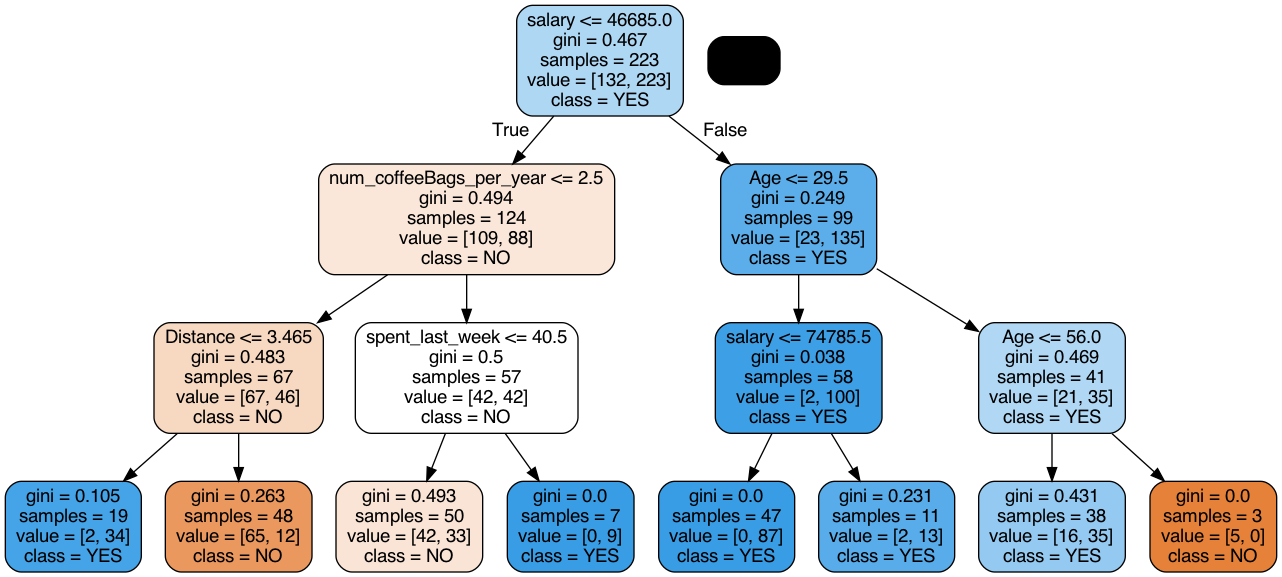

<Figure size 2000x1000 with 0 Axes>

In [129]:
# Random Forest - max_depth=3

rf_tree = firstRFModel.estimators_[0]

# Plot the tree
plt.figure(figsize = (20, 10))

# Convert to DoT format
dot_data = StringIO()
export_graphviz(
    rf_tree,
    out_file=dot_data,
    feature_names=X_train.columns,
    class_names=firstRFModel.classes_,
    filled=True,
    rounded=True,
    max_depth=3
)

# Generate graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 

# Tree A: Gini Decision Tree – gini_model2 (max_depth=3)
- First split: spent_last_month <= 100.5
- Prioritizes "spending behavior" and "distance"
- Much cleaner / purer leaf nodes (many gini=0.0)

- ***Evaluation shown:***
    - Accuracy: 90.76%
    - Balanced Accuracy: 86.59%
    - Precision (YES): 87.64%
    - Recall (YES): 100%
    - Recall (NO): 73.17%

# Tree B: Random Forest (One Tree) – firstRFModel.estimators_[0]
- Limited to max_depth=3
- First split: salary <= 46685
- Uses a mix of features: salary, num_coffeeBags_per_year, age, distance, etc.
- Leaf nodes contain fairly balanced class predictions
- This is just 1 out of 100+ trees in a Random Forest — so not representative of the whole model
- You didn't show its accuracy here, but remember: Random Forest accuracy is based on the ensemble, not individual trees

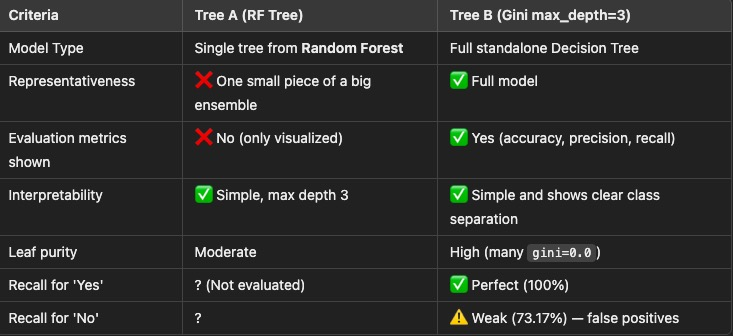

Tree A (Gini model with max_depth 3) is currently better understood and evaluated, and it shows excellent recall for buyers, which may be crucial if you want to capture all potential customers.

However...
🟡 Tree B is just one tree from the Random Forest, so it's not fair to judge the whole forest by one of its trees.

If a full Random Forest model has been evaluated (e.g., with firstRFModel.predict() on test data), and it outperforms the Gini model, then the forest is likely better overall - but you'd need to compare the ensemble metrics.